In [2]:
import pandas as pd

In [3]:
import numpy as np


In [4]:
import matplotlib.pyplot as plt


In [5]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
from google.colab import files

In [7]:
upd = files.upload()

Saving German Foreign expenses.xlsx to German Foreign expenses.xlsx


In [8]:
import io
dt = io.BytesIO(upd['German Foreign expenses.xlsx'])
df = pd.read_excel(dt,sheet_name='Sheet1')

In [9]:
df.head()

,Hostel(0 or 1),Room(0 or 1),Living Expense,Veg (0 or 1),Non Veg(0 or 1),Food Expense,Transport Expense,Personal Expense,Entertainment Expense,HealthCare Expense
0,0,1,326.05,1,0,47.58,97.13,23.69,48.57,100.69
1,0,1,330.05,0,1,61.02,94.32,24.65,49.25,98.32
2,1,0,379.59,1,0,112.97,55.40,25.89,47.52,99.65
3,1,0,382.11,0,1,109.32,52.31,22.32,46.32,96.23
4,0,1,402.91,1,0,43.59,90.95,26.59,28.44,109.36


In [10]:
df.isnull().sum()

Hostel(0 or 1)           0
Room(0 or 1)             0
Living Expense           0
Veg (0 or 1)             0
Non Veg(0 or 1)          0
Food Expense             0
Transport Expense        0
Personal Expense         0
Entertainment Expense    0
HealthCare Expense       0
dtype: int64

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hostel(0 or 1),8.0,0.50000,0.534522,0.00,0.0000,0.500,1.0000,1.00
Room(0 or 1),8.0,0.50000,0.534522,0.00,0.0000,0.500,1.0000,1.00
Living Expense,8.0,372.55500,28.877703,326.05,367.2050,380.605,386.2125,402.91
Veg (0 or 1),8.0,0.50000,0.534522,0.00,0.0000,0.500,1.0000,1.00
Non Veg(0 or 1),8.0,0.50000,0.534522,0.00,0.0000,0.500,1.0000,1.00
Food Expense,8.0,80.99125,31.231321,43.59,54.5325,83.325,109.7325,112.97
Transport Expense,8.0,66.39375,29.884079,26.07,46.0625,71.525,91.7925,97.13
Personal Expense,8.0,24.15875,2.469762,20.32,22.3025,24.170,26.0650,27.56
Entertainment Expense,8.0,38.90000,9.703767,28.44,30.0950,38.770,47.7825,49.25
HealthCare Expense,8.0,103.73750,5.586529,96.23,99.3175,103.830,108.6100,110.32


In [12]:
df['TE'] = df['Entertainment Expense'] + df['Food Expense'] + df['HealthCare Expense'] + df['Living Expense'] + df['Transport Expense'] + df['Personal Expense']

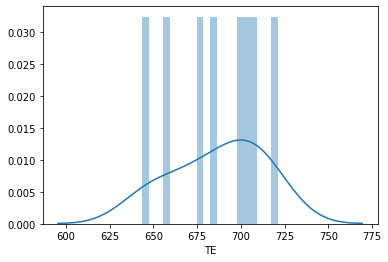

In [13]:
sns.distplot(df['TE'],bins=20)

In [14]:
df.corr()['TE']

Hostel(0 or 1)           0.428822
Room(0 or 1)            -0.428822
Living Expense           0.824718
Veg (0 or 1)             0.020252
Non Veg(0 or 1)         -0.020252
Food Expense             0.424776
Transport Expense       -0.288860
Personal Expense         0.019053
Entertainment Expense   -0.244063
HealthCare Expense       0.059280
TE                       1.000000
Name: TE, dtype: float64

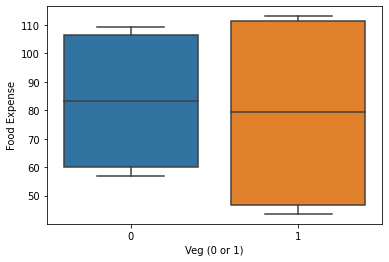

In [15]:
sns.boxplot(x='Veg (0 or 1)',y='Food Expense',data=df)

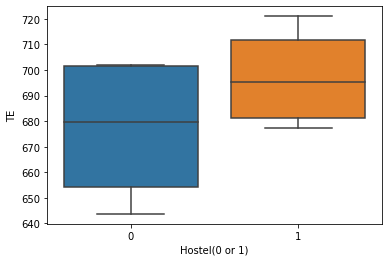

In [16]:
sns.boxplot(x='Hostel(0 or 1)',y='TE',data=df)

In [17]:
df.sort_values('TE',ascending=False)

,Hostel(0 or 1),Room(0 or 1),Living Expense,Veg (0 or 1),Non Veg(0 or 1),Food Expense,Transport Expense,Personal Expense,Entertainment Expense,HealthCare Expense,TE
2,1,0,379.59,1,0,112.97,55.40,25.89,47.52,99.65,721.02
3,1,0,382.11,0,1,109.32,52.31,22.32,46.32,96.23,708.61
4,0,1,402.91,1,0,43.59,90.95,26.59,28.44,109.36,701.84
5,0,1,398.52,0,1,56.85,87.65,20.32,29.63,108.36,701.33
6,1,0,379.59,1,0,110.97,26.07,27.56,31.22,106.97,682.38
7,1,0,381.62,0,1,105.63,27.32,22.25,30.25,110.32,677.39
1,0,1,330.05,0,1,61.02,94.32,24.65,49.25,98.32,657.61
0,0,1,326.05,1,0,47.58,97.13,23.69,48.57,100.69,643.71


In [18]:
df.groupby('Hostel(0 or 1)').mean()['TE']

Hostel(0 or 1)
0    676.1225
1    697.3500
Name: TE, dtype: float64

In [19]:
df.columns

Index(['Hostel(0 or 1)', 'Room(0 or 1)', 'Living Expense', 'Veg (0 or 1)',
       'Non Veg(0 or 1)', 'Food Expense', 'Transport Expense',
       'Personal Expense', 'Entertainment Expense', 'HealthCare Expense',
       'TE'],
      dtype='object')

In [20]:
x = df.drop('TE',axis=1).values
y = df['TE'].values

In [21]:
from sklearn.model_selection import train_test_split

In [87]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=20)

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
scl = MinMaxScaler()

In [88]:
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

In [89]:
X_train

array([[0.        , 1.        , 0.        , 0.        , 1.        ,
        0.25122514, 1.        , 0.44465649, 1.        , 0.15917746],
       [1.        , 0.        , 0.67993412, 1.        , 0.        ,
        0.97117325, 0.        , 1.        , 0.13358962, 0.81797411],
       [0.        , 1.        , 1.        , 1.        , 0.        ,
        0.        , 0.95062271, 0.8148855 , 0.        , 1.        ],
       [1.        , 0.        , 0.67993412, 1.        , 0.        ,
        1.        , 0.42974359, 0.68129771, 0.91686689, 0.2604722 ],
       [1.        , 0.        , 0.714521  , 0.        , 1.        ,
        0.94739118, 0.38446886, 0.        , 0.85920231, 0.        ]])

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [78]:
mdl = Sequential()

In [90]:
X_train.shape

(5, 10)

In [91]:
mdl.add(Dense(10,activation='relu'))
mdl.add(Dense(5,activation='relu'))
mdl.add(Dense(1))
mdl.compile(optimizer='adam',loss='mse')

In [92]:
mdl.fit(x=X_train,y=Y_train,validation_data=(X_test,Y_test),epochs=7)

Epoch 1/7
1/1 [==============================] - 0s 132ms/step - loss: 482536.8438 - val_loss: 455018.5938
Epoch 2/7
1/1 [==============================] - 0s 21ms/step - loss: 482525.0000 - val_loss: 455006.5312
Epoch 3/7
1/1 [==============================] - 0s 20ms/step - loss: 482513.1562 - val_loss: 454994.3438
Epoch 4/7
1/1 [==============================] - 0s 18ms/step - loss: 482501.0938 - val_loss: 454981.9062
Epoch 5/7
1/1 [==============================] - 0s 18ms/step - loss: 482488.9062 - val_loss: 454969.4062
Epoch 6/7
1/1 [==============================] - 0s 20ms/step - loss: 482476.5625 - val_loss: 454956.7188
Epoch 7/7
1/1 [==============================] - 0s 20ms/step - loss: 482463.9062 - val_loss: 454943.7812


In [93]:
losses = pd.DataFrame(mdl.history.history)

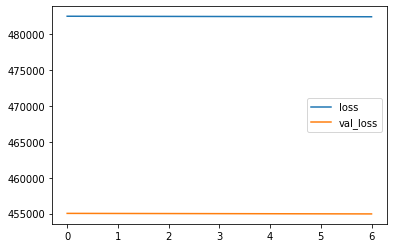

In [94]:
losses.plot()

In [95]:
pd.DataFrame(mdl.history.history)

,loss,val_loss
0,482536.84375,455018.59375
1,482525.00000,455006.53125
2,482513.15625,454994.34375
3,482501.09375,454981.90625
4,482488.90625,454969.40625
5,482476.56250,454956.71875
6,482463.90625,454943.78125


In [102]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [97]:
prdct = mdl.predict(X_test)

In [98]:
prdct

array([[0.06109975],
       [0.06503353],
       [0.06088319]], dtype=float32)

In [99]:
np.sqrt(mean_squared_error(Y_test,prdct))

674.4952103211353

In [100]:
mean_absolute_error(Y_test,prdct)

674.0809945117434

In [101]:
df['TE'].describe()

count      8.000000
mean     686.736250
std       26.459843
min      643.710000
25%      672.445000
50%      691.855000
75%      703.532500
max      721.020000
Name: TE, dtype: float64

In [104]:
explained_variance_score(Y_test,prdct)

2.3101222189181314e-05

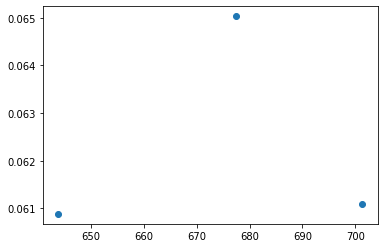

In [105]:
plt.scatter(Y_test,prdct)

In [126]:
sm = df.drop('TE',axis=1).iloc[0]

In [127]:
sm

Hostel(0 or 1)             0.00
Room(0 or 1)               1.00
Living Expense           326.05
Veg (0 or 1)               1.00
Non Veg(0 or 1)            0.00
Food Expense              47.58
Transport Expense         97.13
Personal Expense          23.69
Entertainment Expense     48.57
HealthCare Expense       100.69
Name: 0, dtype: float64

In [128]:
sm_upd = scl.transform(sm.values.reshape(-1,10))

In [149]:
rst = mdl.predict(sm_upd)*(10545.905)

In [150]:
rst


array([[642.0681]], dtype=float32)

In [153]:
import json
f_nl = {"Estimation" : str(rst) }
f_nl = str(f_nl)
rst = json.dumps(f_nl)

In [154]:
rst

'"{\'Estimation\': \'[[642.0681]]\'}"'